In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!ls ../data/cleaned

2016-2021_fieldgoals_stats.csv    2016-2021_receiving_stats.csv
2016-2021_fumbles_stats.csv       2016-2021_rushing_stats.csv
2016-2021_interceptions_stats.csv 2016-2021_tackling_stats.csv
2016-2021_passing_stats.csv       all_superbowl_winning_rosters.csv


In [3]:
df = pd.read_csv("../data/cleaned/all_superbowl_winning_rosters.csv")
df.head()

,year,team,no.,player,age,position,games_played,games_started,weight,height,...,date_of_birth,years_in_league,approx_value,drafted_(tm/rnd/pick/yr),player_additional,salary,drafted_team/undrafted,drafted_round,drafted_pick,drafted_year
0,2022,kansas,73.0,Nick Allegretti,26.0,G,17,3.0,310.0,6-4,...,1996-04-21,3,3.0,Kansas City Chiefs / 7th / 216th pick / 2019,AlleNi00,NaN,Kansas City Chiefs,7th,216th pick,2019
1,2022,kansas,32.0,Ugo Amadi,25.0,S,1,0.0,201.0,5-9,...,1997-05-16,3,0.0,Seattle Seahawks / 4th / 132nd pick / 2019,AmadUg00,NaN,Seattle Seahawks,4th,132nd pick,2019
2,2022,kansas,19.0,Matt Ammendola,26.0,K,2,0.0,195.0,5-9,...,1996-12-11,1,0.0,Undrafted,AmmeMa00,NaN,Undrafted,NaN,NaN,NaN
3,2022,kansas,39.0,Zayne Anderson,25.0,DB,3,0.0,206.0,6-2,...,1997-01-03,1,0.0,Undrafted,AndeZa02,NaN,Undrafted,NaN,NaN,NaN
4,2022,kansas,81.0,Blake Bell,31.0,TE,3,1.0,252.0,6-6,...,1991-08-07,7,0.0,San Francisco 49ers / 4th / 117th pick / 2015,BellBl00,NaN,San Francisco 49ers,4th,117th pick,2015


## Quick df cleaning

In [4]:
# Cast year as string type to allow for taking first 3 elem
df['year'] = df['year'].astype(str)

In [8]:
# adding decade
df['decade'] = df['year'].str[:3]+'0s'

In [9]:
df

,year,team,no.,player,age,position,games_played,games_started,weight,height,...,years_in_league,approx_value,drafted_(tm/rnd/pick/yr),player_additional,salary,drafted_team/undrafted,drafted_round,drafted_pick,drafted_year,decade
0,2022,kansas,73.0,Nick Allegretti,26.0,G,17,3.0,310.0,6-4,...,3,3.0,Kansas City Chiefs / 7th / 216th pick / 2019,AlleNi00,NaN,Kansas City Chiefs,7th,216th pick,2019,2020s
1,2022,kansas,32.0,Ugo Amadi,25.0,S,1,0.0,201.0,5-9,...,3,0.0,Seattle Seahawks / 4th / 132nd pick / 2019,AmadUg00,NaN,Seattle Seahawks,4th,132nd pick,2019,2020s
2,2022,kansas,19.0,Matt Ammendola,26.0,K,2,0.0,195.0,5-9,...,1,0.0,Undrafted,AmmeMa00,NaN,Undrafted,NaN,NaN,NaN,2020s
3,2022,kansas,39.0,Zayne Anderson,25.0,DB,3,0.0,206.0,6-2,...,1,0.0,Undrafted,AndeZa02,NaN,Undrafted,NaN,NaN,NaN,2020s
4,2022,kansas,81.0,Blake Bell,31.0,TE,3,1.0,252.0,6-6,...,7,0.0,San Francisco 49ers / 4th / 117th pick / 2015,BellBl00,NaN,San Francisco 49ers,4th,117th pick,2015,2020s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3154,1966,greenbay,63.0,Fuzzy Thurston,33.0,LG,12,12.0,247.0,6-1,...,8,6.0,Philadelphia Eagles / 5th / 54th pick / 1956,ThurFu20,NaN,Philadelphia Eagles,5th,54th pick,1956,1960s
3155,1966,greenbay,37.0,Phil Vandersea,23.0,LB,14,0.0,245.0,6-3,...,0,4.0,Denver Broncos / 9th / 65th pick / 1965 Green ...,VandPh20,NaN,Denver Broncos,9th,65th pick,1965 Green Bay Packers,1960s
3156,1966,greenbay,73.0,Jim Weatherwax,23.0,DT,14,1.0,260.0,6-7,...,0,2.0,San Diego Chargers / 5th / 38th pick / 1965 Gr...,WeatJi22,NaN,San Diego Chargers,5th,38th pick,1965 Green Bay Packers,1960s
3157,1966,greenbay,24.0,Willie Wood,30.0,SS,14,14.0,190.0,5-10,...,6,12.0,Undrafted,WoodWi00,NaN,Undrafted,NaN,NaN,NaN,1960s


In [10]:
# Grouping by decade, team that won SB, team that drafted (or undrafted) and the number of players from draft team in said sb-winning team 
drafted_sbw = df.groupby(['decade', 'team','drafted_team/undrafted']).agg({
    'drafted_team/undrafted':'count'}).rename(columns={'drafted_team/undrafted':'total_drafted'}).reset_index()


# Grouping by decade, team that won the superbowl, team that drafted, position, and number of players of that position that won a superbowl in that decade for said team
drafted_sbw_pos = df.groupby(['decade', 'position', 'team', 'drafted_team/undrafted']).agg({
    'drafted_team/undrafted':'count'}).rename(columns={'drafted_team/undrafted':'total_drafted'}).reset_index()


In [11]:
drafted_sbw_pos.sort_values('total_drafted', ascending=False)

,decade,position,team,drafted_team/undrafted,total_drafted
360,1970s,WR,pittsburgh,Pittsburgh Steelers,16
277,1970s,RB,pittsburgh,Pittsburgh Steelers,13
1446,2010s,DB,newengland,New England Patriots,12
1150,2000s,LB,newengland,Undrafted,12
674,1990s,DB,dallas,Dallas Cowboys,11
...,...,...,...,...,...
826,1990s,LLB,denver,Denver Broncos,1
825,1990s,LLB,dallas,Undrafted,1
823,1990s,LILB,newyork,Dallas Cowboys,1
822,1990s,LG,washington,Washington Redskins,1


In [12]:
drafted_sbw.sort_values('total_drafted', ascending=False)

,decade,team,drafted_team/undrafted,total_drafted
103,1970s,pittsburgh,Pittsburgh Steelers,142
162,1980s,sanfrancisco,San Francisco 49ers,98
198,1990s,dallas,Dallas Cowboys,88
497,2010s,newengland,New England Patriots,88
351,2000s,newengland,New England Patriots,81
...,...,...,...,...
381,2000s,newyork,Detroit Lions,1
380,2000s,newyork,Denver Broncos,1
379,2000s,newyork,Chicago Bears,1
31,1960s,kansas,Pittsburgh Steelers,1


## Visualisation of draft by teams

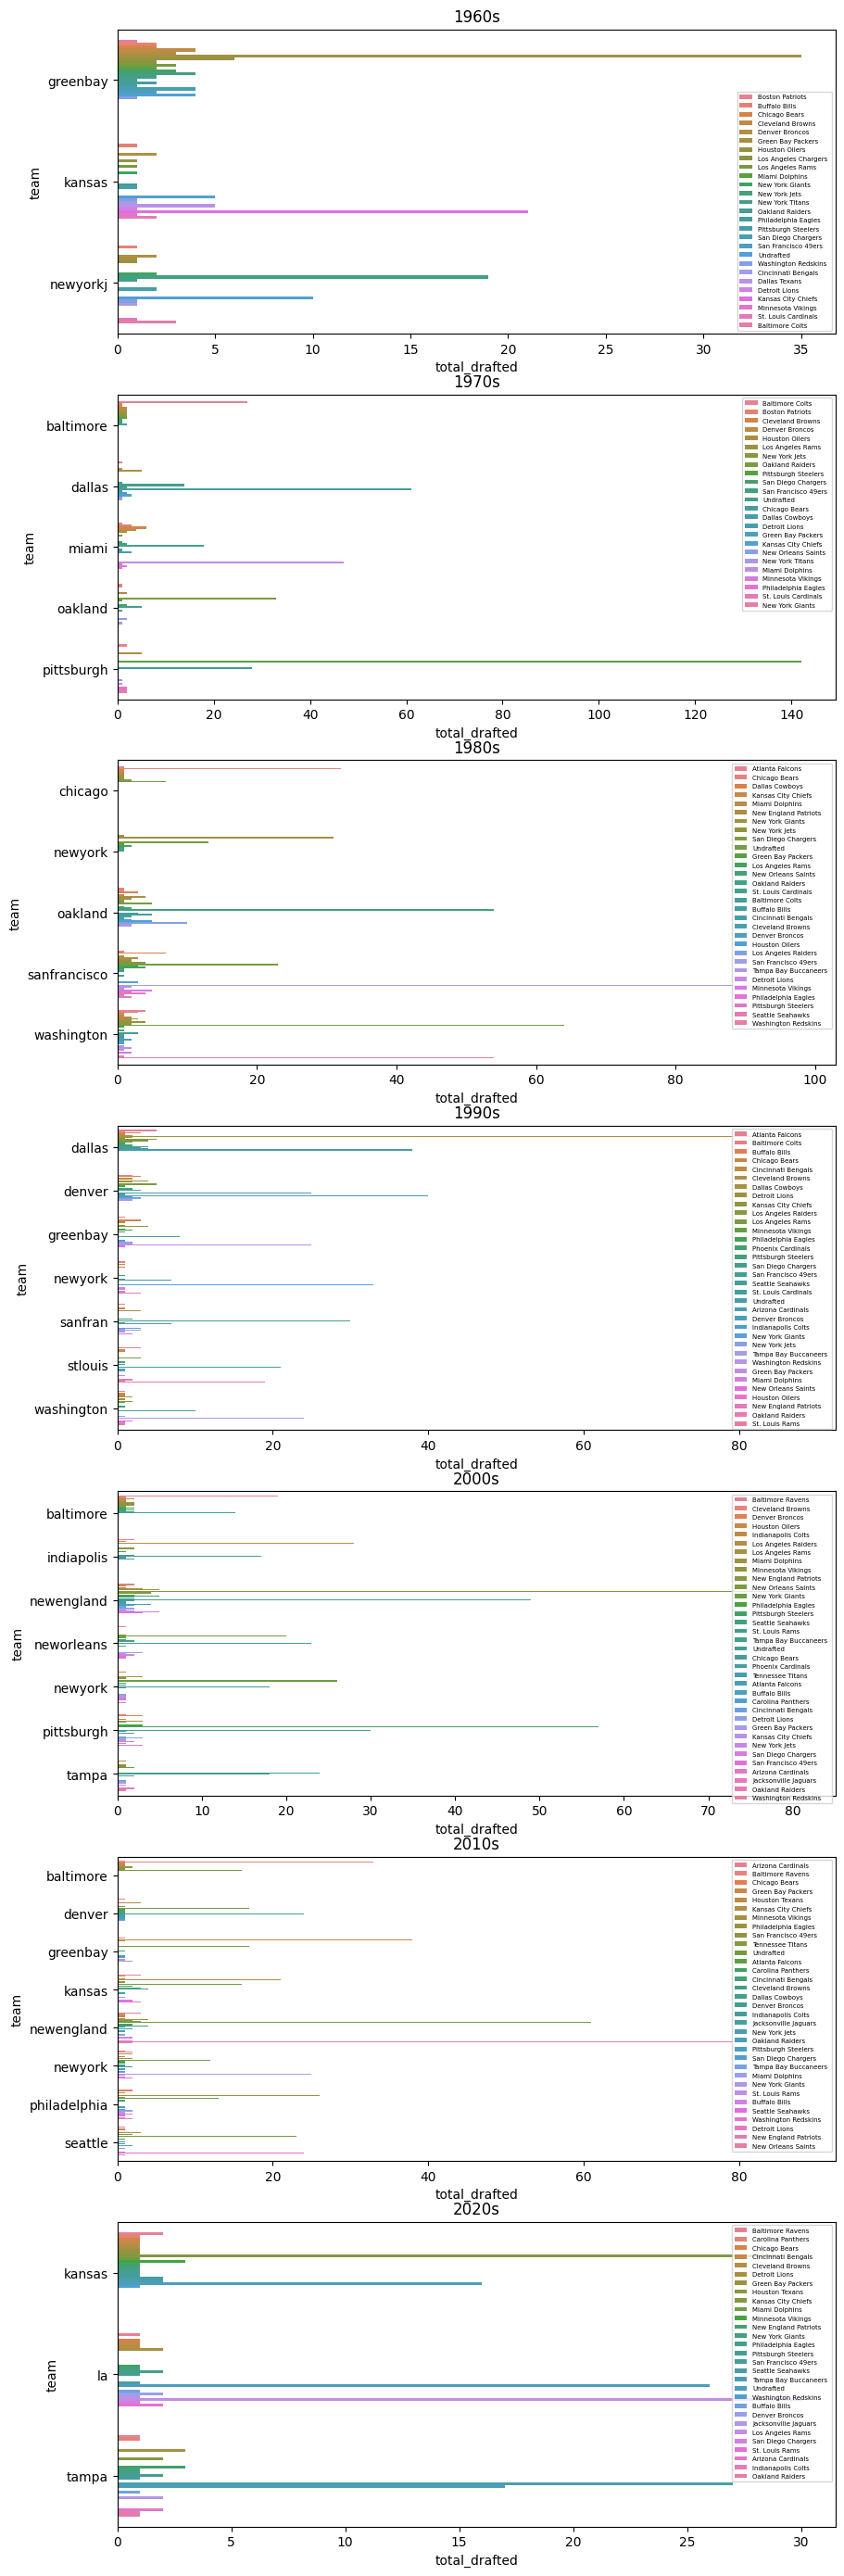

In [13]:
# Plot split by decade to show the teams that drafted the most players which won SBs for teams who won superbowls in that decade.

# Conclusion: Teams that won the most superbowls traditionally drafted the most players themselves or signed a lot through
# undrafted players

fig, ax = plt.subplots(7,1, figsize=(10, 35))
sns.color_palette()

i = 0
for decade in drafted_sbw['decade'].unique():
    data=drafted_sbw.loc[drafted_sbw['decade'] == decade]
    sns.barplot(data=data, y='team', x='total_drafted', hue='drafted_team/undrafted', ax=ax[i]).legend(fontsize='5')
    ax[i].set_title(decade)
    i += 1
plt.show()

In [17]:
# Filtering out any rows where total_drafted < n

n = 3

display(drafted_sbw.shape)
display(drafted_sbw.loc[drafted_sbw['total_drafted'] > n].shape)
drafted_sbw_filtered = drafted_sbw.loc[drafted_sbw['total_drafted'] > n]


(614, 4)

(111, 4)

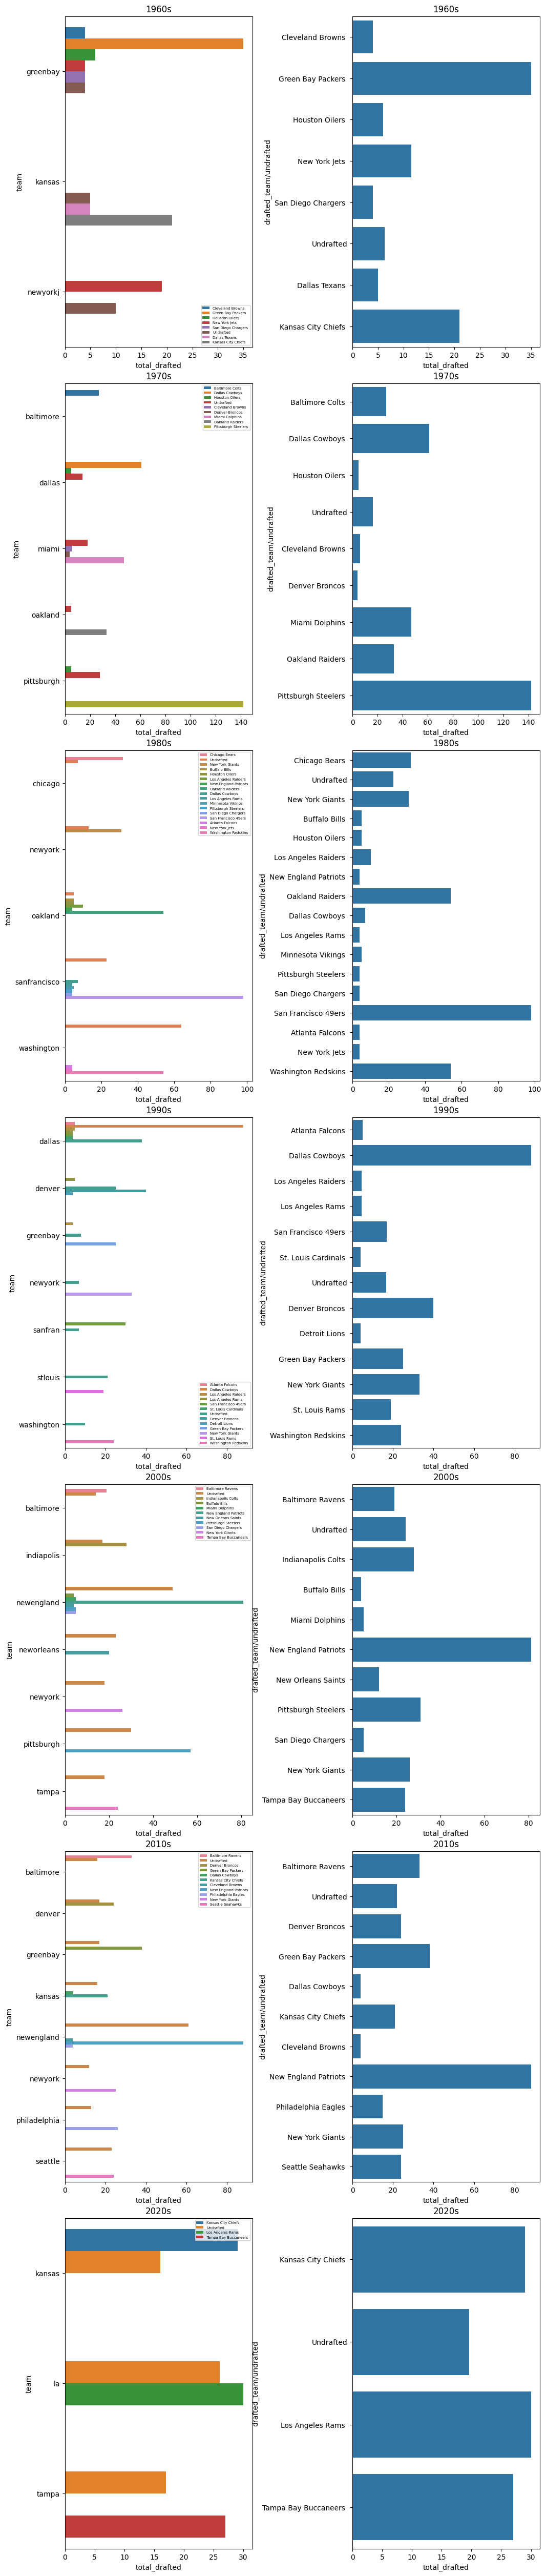

In [19]:
# Creating same graphs as before, with filtered dataframes where total_drafted > n

fig, ax = plt.subplots(7,2, figsize=(10, 50))
sns.color_palette()
fig.tight_layout(w_pad=11.0, h_pad=3.0)
i = 0
for decade in drafted_sbw_filtered['decade'].unique():
    data=drafted_sbw_filtered.loc[drafted_sbw_filtered['decade'] == decade]
    sns.barplot(data=data, y='team', x='total_drafted', hue='drafted_team/undrafted', ax=ax[i, 0]).legend(fontsize='5')
    ax[i, 0].set_title(decade)
    sns.barplot(data=data, y='drafted_team/undrafted', x='total_drafted', errorbar=None, ax=ax[i, 1])#.legend(fontsize='5')
    ax[i, 1].set_title(decade)
    i += 1
plt.show()

In [26]:
# Grouping number of teams involved a SB-winning's roster.

decade_grouped_teams_to_player_drafting = drafted_sbw.groupby('decade').agg({
    'team':'nunique', 'drafted_team/undrafted':'nunique', 'total_drafted':'sum'}).reset_index()
decade_grouped_teams_to_player_drafting

,decade,team,drafted_team/undrafted,total_drafted
0,1960s,3,27,174
1,1970s,5,24,465
2,1980s,5,30,537
3,1990s,7,34,557
4,2000s,7,35,596
5,2010s,8,33,621
6,2020s,3,29,209


In [30]:
# Adding column for Average no. of teams drafting to winning teams per decade
decade_grouped_teams_to_player_drafting['teamsdrafts_to_sb_winners'] = round(decade_grouped_teams_to_player_drafting[
                                                                             'drafted_team/undrafted']/decade_grouped_teams_to_player_drafting['team'], 2)

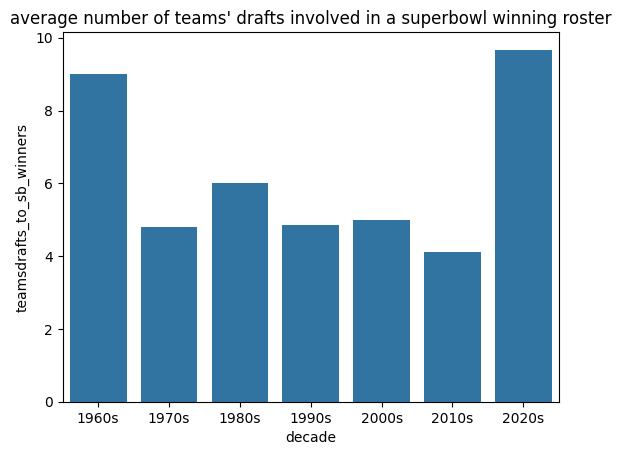

In [35]:
# Barplot to show the average number of teams' drafts involved in a superbowl winning roster. 

sns.barplot(data=decade_grouped_teams_to_player_drafting, x='decade', y='teamsdrafts_to_sb_winners').set_title("average number of teams' drafts involved in a superbowl winning roster")
plt.show()

## Visualisation of drafting players by position

In [57]:
# Creating positional groupings for lighter visualisation.

offensive_line = {'offensive_line':['LT', 'T', 'LG', 'G', 'C', 'RG', 'RT', 'ROT']}
receiver = {'receiver':['WR', 'TE', 'SE','FL']}
running_back = {'backs':['RB', 'HB', 'TB', 'FB', 'LH,' 'RH', 'BB' 'B', 'WB']}
special_teams = {'special_teamers':[  'LS', 'K', 'P', 'PR', 'KR', 'RET']}
defensive_line = {'defensive_line':['DL', 'E', 'LDE', 'DE', 'LDT', 'DT', 'NT', 'MG' , 'DG', 'RDT', 'RDE']}
linebacker = {'linebacker':['LOLB', 'RUSH', 'OLB', 'LLB', 'WILL', 'ILB', 'SLB', 'MLB', 'WLB', 'RILB', 'ROLB', 'SAM', 'LB']}
defensive_backs = {'D_backs':['LCB', 'CB', 'RCB', 'SS', 'FS', 'LDH', 'RDH', 'S', 'RS', 'DB']}
quarterback = {'Quarterback':'QB'}

In [58]:
# Creating positional groupings for lighter visualisation.

positional_groups = {'offensive_line':['LT', 'T', 'LG', 'G', 'C', 'RG', 'RT', 'ROT'], 'receiver':['WR', 'TE','SE', 'FL'],
                    'backs':['RB', 'HB', 'TB', 'FB', 'LH,' 'RH', 'BB' 'B', 'WB'], 'special_teamers':[ 'LS', 'K', 'P', 'PR', 'KR', 'RET'],
                    'defensive_line':['DL', 'E', 'LE', 'RE', 'LDE', 'DE', 'LDT', 'DT', 'NT', 'MG' , 'DG', 'RDT', 'RDE'], 
                    'linebacker':['LOLB', 'RUSH', 'OLB', 'LLB', 'WILL', 'ILB', 'SLB', 'MLB', 'WLB', 'RILB', 'ROLB', 'SAM', 'LB'],
                    'D_backs':['LCB', 'CB', 'RCB', 'SS', 'FS', 'LDH', 'RDH', 'S', 'RS', 'DB'],
                    'Quarterback':['QB']}

In [59]:
def get_position(row):
    for position, positions_list in positional_groups.items():
        if any(pos in row['position'] for pos in positions_list):
            return position
    return None
#drafted_sbw_pos['positional_group'] = 
drafted_sbw_pos['positional_group'] = drafted_sbw_pos.apply(get_position, axis=1)


In [60]:
drafted_sbw_pos.head()

,decade,position,team,drafted_team/undrafted,total_drafted,positional_group
0,1960s,C,greenbay,Green Bay Packers,1,offensive_line
1,1960s,C,greenbay,New York Jets,2,offensive_line
2,1960s,C,greenbay,Oakland Raiders,1,offensive_line
3,1960s,C,kansas,Dallas Texans,1,offensive_line
4,1960s,C,kansas,St. Louis Cardinals,1,offensive_line


In [61]:
drafted_sbw_pos_group = drafted_sbw_pos.groupby([
    'decade', 'drafted_team/undrafted', 'positional_group'])['total_drafted'].sum().reset_index()

In [62]:
drafted_sbw_pos_group.head()

,decade,drafted_team/undrafted,positional_group,total_drafted
0,1960s,Baltimore Colts,offensive_line,2
1,1960s,Baltimore Colts,receiver,1
2,1960s,Boston Patriots,offensive_line,1
3,1960s,Buffalo Bills,D_backs,2
4,1960s,Buffalo Bills,linebacker,2


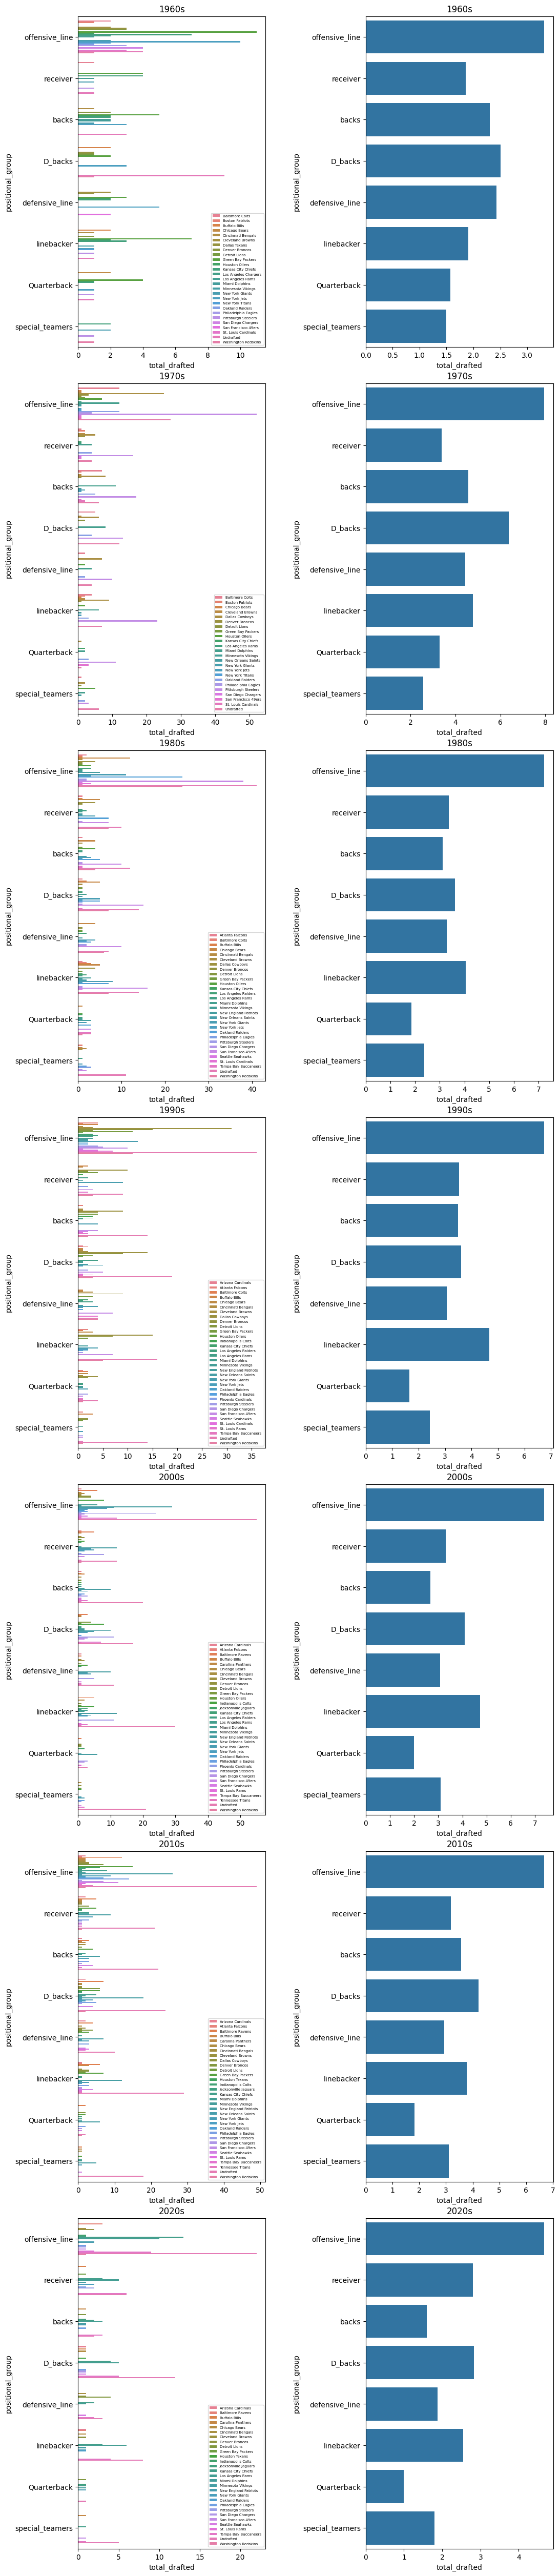

In [64]:
# Plot to show which positions were drafted/signed the most by decade, and by which teams

# Conclusion: Overall players that were on superbowl winning teams included a lot of offensive linemen throughout the decades
# Defensive back and linebackers tended to be the next sought after group in terms of overall numbers

positions_order = ['offensive_line', 'receiver', 'backs', 'D_backs', 'defensive_line', 'linebacker', 'Quarterback', 'special_teamers']

fig, ax = plt.subplots(7,2, figsize=(10, 50))
sns.color_palette()
fig.tight_layout(w_pad=11.0, h_pad=3.0)
i = 0
for decade in drafted_sbw_pos_group['decade'].unique():
    data=drafted_sbw_pos_group.loc[drafted_sbw_pos_group['decade'] == decade]
    sns.barplot(data=data, y='positional_group', x='total_drafted', order=positions_order, 
                hue='drafted_team/undrafted', ax=ax[i, 0]).legend(fontsize='5')
    ax[i, 0].set_title(decade)
    sns.barplot(data=data, y='positional_group', x='total_drafted', order=positions_order, errorbar=None, ax=ax[i, 1])#.legend(fontsize='5')
    ax[i, 1].set_title(decade)
    i += 1
plt.show()

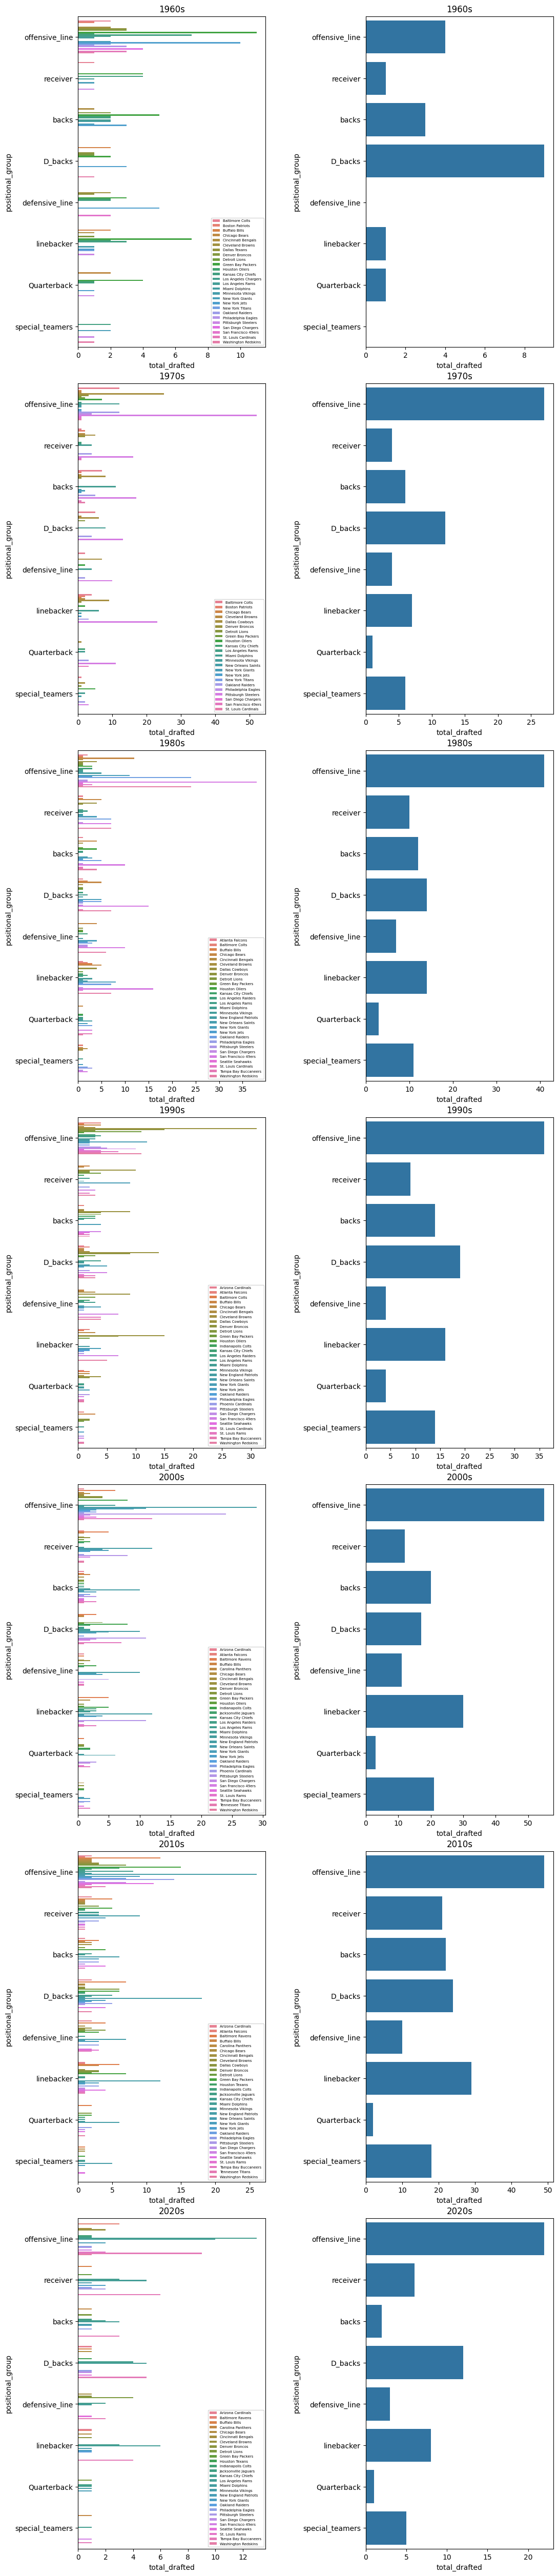

In [65]:
fig, ax = plt.subplots(7,2, figsize=(10, 50))
sns.color_palette()
fig.tight_layout(w_pad=11.0, h_pad=3.0)
i = 0
for decade in drafted_sbw_pos_group['decade'].unique():
    data=drafted_sbw_pos_group.loc[drafted_sbw_pos_group['decade'] == decade]
    sns.barplot(data=data.loc[data['drafted_team/undrafted'] != 'Undrafted'], y='positional_group', x='total_drafted', 
                order=positions_order, hue='drafted_team/undrafted', ax=ax[i, 0]).legend(fontsize='5')
    ax[i, 0].set_title(decade)
    sns.barplot(data=data.loc[data['drafted_team/undrafted'] == 'Undrafted'], y='positional_group', x='total_drafted', order=positions_order, 
                errorbar=None, ax=ax[i, 1])#.legend(fontsize='5')
    ax[i, 1].set_title(decade)
    i += 1
plt.show()

### Analysis Conclusions: 

In terms of where players who won super bowls were drafted by or if they were drafted at all, we see that throughout the decades, offensive linemen and defensive backs were the highest volume of players signed to rosters that ended up winning super bowls in their careers. 

The first assumption of why offensive linemen are important: protect the quarterback, and win the game up front for the run game. This assumption was valid for both offensive linemen who were drafted and those who went undrafted. 
The next assumption regarding defensive backs, stop the opposing players ability to pass the ball downfield to limit their overall abilities. 


When looking at the number of teams involved in a superbowl winning team's roster, this showed that typically players were signed from 5-6 different teams (free agency also being a 'team' in this case) per super bowl winning roster, when there are a spread out number of teams winning superbowls in a given decade. 

Finally, for the teams that won multiple super bowls in particular decades, it was clear to see that they drafted a lot of players onto their roster themselves, with the the next typical 'team' being players who went undrafted, which goes to show the importance and significance for an NFL organisation to scout extensively, draft well and never count out undrafted free agents when looking to build a super bowl winning roster.